In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('spambase_data.csv', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
from sklearn import preprocessing

In [6]:
min_max_scalar = preprocessing.MinMaxScaler()

In [7]:
df_min_max = min_max_scalar.fit_transform(df)

In [8]:
display(df_min_max)

array([[0.00000000e+00, 4.48179272e-02, 1.25490196e-01, ...,
        6.00720865e-03, 1.74873737e-02, 1.00000000e+00],
       [4.62555066e-02, 1.96078431e-02, 9.80392157e-02, ...,
        1.00120144e-02, 6.48358586e-02, 1.00000000e+00],
       [1.32158590e-02, 0.00000000e+00, 1.39215686e-01, ...,
        4.84581498e-02, 1.42550505e-01, 1.00000000e+00],
       ...,
       [6.60792952e-02, 0.00000000e+00, 5.88235294e-02, ...,
        5.00600721e-04, 7.38636364e-03, 0.00000000e+00],
       [2.11453744e-01, 0.00000000e+00, 0.00000000e+00, ...,
        4.00480577e-04, 4.86111111e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.27450980e-01, ...,
        4.00480577e-04, 2.46212121e-03, 0.00000000e+00]])

In [9]:
df_mm = df.copy()

In [10]:
for column in df_mm.columns:
    df_mm[column] = (df_mm[column] - df_mm[column].min()) / (df_mm[column].max() - df_mm[column].min())

In [11]:
print(df_mm)

            0         1         2    3      4         5         6         7   \
0     0.000000  0.044818  0.125490  0.0  0.032  0.000000  0.000000  0.000000   
1     0.046256  0.019608  0.098039  0.0  0.014  0.047619  0.028886  0.006301   
2     0.013216  0.000000  0.139216  0.0  0.123  0.032313  0.026135  0.010801   
3     0.000000  0.000000  0.000000  0.0  0.063  0.000000  0.042641  0.056706   
4     0.000000  0.000000  0.000000  0.0  0.063  0.000000  0.042641  0.056706   
...        ...       ...       ...  ...    ...       ...       ...       ...   
4596  0.068282  0.000000  0.121569  0.0  0.000  0.052721  0.000000  0.000000   
4597  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
4598  0.066079  0.000000  0.058824  0.0  0.000  0.000000  0.000000  0.000000   
4599  0.211454  0.000000  0.000000  0.0  0.032  0.000000  0.000000  0.000000   
4600  0.000000  0.000000  0.127451  0.0  0.000  0.000000  0.000000  0.000000   

            8         9   ...        48

In [12]:
df_mm.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1.0
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1.0
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1.0
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1.0
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1.0


In [117]:
# for normalized data for euclidean metric
X = df_mm[df_mm.columns[: - 1]]
Y = df_mm[len(df_mm.columns) - 1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 30)

knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

print(classification_report(Y_test, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predictions))
print("\nAccuracy")
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       578
         1.0       0.89      0.82      0.85       343

    accuracy                           0.89       921
   macro avg       0.89      0.88      0.89       921
weighted avg       0.89      0.89      0.89       921

Confusion Matrix
[[543  35]
 [ 62 281]]

Accuracy
0.8946796959826275


In [14]:
# for normalized data for manhattan metric
X = df_mm[df_mm.columns[: - 1]]
Y = df_mm[len(df_mm.columns) - 1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 30)

knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

print(classification_report(Y_test, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predictions))
print("\nAccuracy")
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       578
         1.0       0.90      0.82      0.86       343

    accuracy                           0.90       921
   macro avg       0.90      0.88      0.89       921
weighted avg       0.90      0.90      0.90       921

Confusion Matrix
[[546  32]
 [ 61 282]]

Accuracy
0.8990228013029316


In [15]:
# for normalized data for euclidean metric for rote learner
X = df_mm[df_mm.columns[: - 1]]
Y = df_mm[len(df_mm.columns) - 1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 30)

knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

print(classification_report(Y_test, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predictions))
print("\nAccuracy")
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       578
         1.0       0.89      0.85      0.87       343

    accuracy                           0.91       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix
[[542  36]
 [ 51 292]]

Accuracy
0.9055374592833876


In [16]:
# for normalized data for manhattan metric for rote learner
X = df_mm[df_mm.columns[: - 1]]
Y = df_mm[len(df_mm.columns) - 1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 30)

knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

print(classification_report(Y_test, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test, predictions))
print("\nAccuracy")
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       578
         1.0       0.90      0.82      0.86       343

    accuracy                           0.90       921
   macro avg       0.90      0.88      0.89       921
weighted avg       0.90      0.90      0.90       921

Confusion Matrix
[[546  32]
 [ 61 282]]

Accuracy
0.8990228013029316


In [85]:
arr = np.arange(40).reshape(2, 20)
arr = np.asarray(arr, dtype = np.float64)

In [86]:
# for normalized data for euclidean metric with K varying from 1 to 20 and K(5) - fold cross validation 
X = df_mm[df_mm.columns[: - 1]]
Y = df_mm[len(df_mm.columns) - 1]



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 30)

for i in range (1, 21):
    
    print("For K = ", i)
    
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    knn.fit(X_train, Y_train)
    
    scores = cross_val_score(knn, X, Y, cv = 5, scoring = 'accuracy')

    predictions = knn.predict(X_test)

    print(classification_report(Y_test, predictions))
    
    print("Confusion Matrix")
    con = confusion_matrix(Y_test, predictions)
    print(con)
    
    print("\nAccuracy")
    acc = accuracy_score(Y_test, predictions)
    print(acc)
    
    print("\nScores")
    print(scores)
    
    print("\nMean Score")
    print(scores.mean())
    print("\n")
    
    a = acc
#     print(a)
    arr[0][i - 1] = i
    arr[1][i - 1] = a #accuracy_score(Y_test, predictions)
#     print("After applying K fold cross Validation")
    
#     knn_cv = KNeighb

# print(arr)

For K =  1
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       578
         1.0       0.89      0.85      0.87       343

    accuracy                           0.91       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix
[[542  36]
 [ 51 292]]

Accuracy
0.9055374592833876

Scores
[0.86536374 0.8923913  0.91304348 0.90543478 0.75108696]

Mean Score
0.8654640513619413


For K =  2
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       578
         1.0       0.92      0.75      0.83       343

    accuracy                           0.88       921
   macro avg       0.89      0.86      0.87       921
weighted avg       0.89      0.88      0.88       921

Confusion Matrix
[[556  22]
 [ 86 257]]

Accuracy
0.8827361563517915

Scores
[0.84256243 0.88804348 0.91413043 0.88152174 0.78478261]

Mean Score
0.862208138

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90       578
         1.0       0.89      0.76      0.82       343

    accuracy                           0.88       921
   macro avg       0.88      0.85      0.86       921
weighted avg       0.88      0.88      0.87       921

Confusion Matrix
[[547  31]
 [ 84 259]]

Accuracy
0.8751357220412594

Scores
[0.83821933 0.86847826 0.89673913 0.90217391 0.7673913 ]

Mean Score
0.8546003871028655


For K =  19
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.90       578
         1.0       0.88      0.78      0.82       343

    accuracy                           0.88       921
   macro avg       0.88      0.86      0.86       921
weighted avg       0.88      0.88      0.87       921

Confusion Matrix
[[541  37]
 [ 77 266]]

Accuracy
0.8762214983713354

Scores
[0.84690554 0.86847826 0.90326087 0.90217391 0.76304348]

Mean Score
0.8567724118396829




In [87]:
import matplotlib.pyplot as mp

In [88]:
print(arr)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.         11.         12.
  13.         14.         15.         16.         17.         18.
  19.         20.        ]
 [ 0.90553746  0.88273616  0.8946797   0.88925081  0.88707926  0.88273616
   0.89033659  0.88165038  0.89250814  0.88490771  0.89142237  0.88925081
   0.89250814  0.88490771  0.88490771  0.88490771  0.8805646   0.87513572
   0.8762215   0.87404995]]


Text(0.5, 0, 'K')

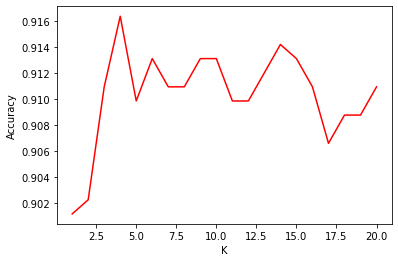

In [110]:
mp.plot(arr[0], arr[1], color = 'red')
mp.ylabel('Accuracy')
mp.xlabel('K')

In [99]:
# for normalized data for manhattan metric with K varying from 1 to 20 and K(5) - fold cross validation 
X = df_mm[df_mm.columns[: - 1]]
Y = df_mm[len(df_mm.columns) - 1]

arr = np.arange(40).reshape(2, 20)
arr = np.asarray(arr, dtype = np.float64)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 30)

for i in range (1, 21):
    
    print("For K = ", i)
    
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
    knn.fit(X_train, Y_train)
    
    scores = cross_val_score(knn, X, Y, cv = 5, scoring = 'accuracy')

    predictions = knn.predict(X_test)

    print(classification_report(Y_test, predictions))
    
    print("Confusion Matrix")
    con = confusion_matrix(Y_test, predictions)
    print(con)
    
    print("\nAccuracy")
    acc = accuracy_score(Y_test, predictions)
    print(acc)
    
    print("\nScores")
    print(scores)
    
    print("\nMean Score")
    print(scores.mean())
    print("\n")
    
    a = acc
    arr[0][i - 1] = i
    arr[1][i - 1] = a

For K =  1
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       578
         1.0       0.89      0.84      0.86       343

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921

Confusion Matrix
[[543  35]
 [ 56 287]]

Accuracy
0.9011943539630836

Scores
[0.86862106 0.89456522 0.91195652 0.89456522 0.75543478]

Mean Score
0.8650285606382477


For K =  2
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       578
         1.0       0.96      0.74      0.84       343

    accuracy                           0.89       921
   macro avg       0.91      0.86      0.88       921
weighted avg       0.90      0.89      0.89       921

Confusion Matrix
[[567  11]
 [ 88 255]]

Accuracy
0.8925081433224755

Scores
[0.85016287 0.88804348 0.90108696 0.875      0.81521739]

Mean Score
0.865902138

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       578
         1.0       0.94      0.72      0.82       343

    accuracy                           0.88       921
   macro avg       0.90      0.85      0.86       921
weighted avg       0.89      0.88      0.88       921

Confusion Matrix
[[563  15]
 [ 95 248]]

Accuracy
0.8805646036916395

Scores
[0.85233442 0.87173913 0.91086957 0.88913043 0.80978261]

Mean Score
0.8667712316480196


For K =  19
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       578
         1.0       0.94      0.74      0.83       343

    accuracy                           0.88       921
   macro avg       0.90      0.85      0.87       921
weighted avg       0.89      0.88      0.88       921

Confusion Matrix
[[562  16]
 [ 90 253]]

Accuracy
0.8849077090119435

Scores
[0.8577633  0.87826087 0.91413043 0.9        0.80652174]

Mean Score
0.871335268847661


F

In [100]:
print(arr)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.         11.         12.
  13.         14.         15.         16.         17.         18.
  19.         20.        ]
 [ 0.90119435  0.89250814  0.8990228   0.88599349  0.89250814  0.88816504
   0.8946797   0.88273616  0.89250814  0.87730727  0.88599349  0.8805646
   0.88925081  0.88382193  0.88816504  0.88273616  0.88165038  0.8805646
   0.88490771  0.87947883]]


Text(0.5, 0, 'K')

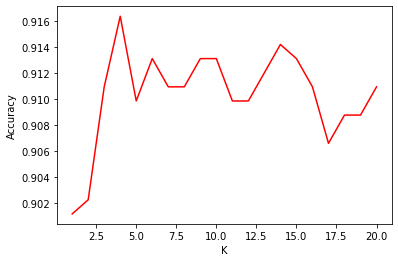

In [109]:
# print(arr)
mp.plot(arr[0], arr[1], color = 'red')
mp.ylabel('Accuracy')
mp.xlabel('K')

In [102]:
X = df_mm[df_mm.columns[: - 1]]
Y = df_mm[len(df_mm.columns) - 1]

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 30)

In [113]:
a = np.arange(40).reshape(2, 20)
a = np.asarray(a, dtype = np.float64)

In [114]:
for i in range (1, 21):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan', weights = 'distance')
    
    knn.fit(X_train, Y_train)
    
    scores = cross_val_score(knn, X, Y, cv = 5, scoring = 'accuracy')

    predictions = knn.predict(X_test)

    print(classification_report(Y_test, predictions))
    
    print("Confusion Matrix")
    con = confusion_matrix(Y_test, predictions)
    print(con)
    
    print("\nAccuracy")
    acc = accuracy_score(Y_test, predictions)
    print(acc)
    
    print("\nScores")
    print(scores)
    
    print("\nMean Score")
    print(scores.mean())
    print("\n")
    
    a[0][i - 1] = i
    a[1][i - 1] = acc

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       578
         1.0       0.89      0.84      0.86       343

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921

Confusion Matrix
[[543  35]
 [ 56 287]]

Accuracy
0.9011943539630836

Scores
[0.86862106 0.89456522 0.91195652 0.89456522 0.75543478]

Mean Score
0.8650285606382477


              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       578
         1.0       0.89      0.84      0.86       343

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921

Confusion Matrix
[[544  34]
 [ 56 287]]

Accuracy
0.9022801302931596

Scores
[0.86862106 0.89456522 0.91195652 0.89565217 0.75652174]

Mean Score
0.8654633432469433


            

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       578
         1.0       0.95      0.80      0.87       343

    accuracy                           0.91       921
   macro avg       0.92      0.89      0.90       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix
[[564  14]
 [ 70 273]]

Accuracy
0.9087947882736156

Scores
[0.87187839 0.89565217 0.93478261 0.92173913 0.81847826]

Mean Score
0.888506113392815


              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       578
         1.0       0.95      0.79      0.87       343

    accuracy                           0.91       921
   macro avg       0.92      0.89      0.90       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix
[[565  13]
 [ 71 272]]

Accuracy
0.9087947882736156

Scores
[0.87947883 0.89673913 0.93478261 0.92173913 0.82065217]

Mean Score
0.890678374167965


              

In [115]:
print(a)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.         11.         12.
  13.         14.         15.         16.         17.         18.
  19.         20.        ]
 [ 0.90119435  0.90228013  0.91096634  0.91639522  0.90988056  0.91313789
   0.91096634  0.91096634  0.91313789  0.91313789  0.90988056  0.90988056
   0.91205212  0.91422367  0.91313789  0.91096634  0.90662324  0.90879479
   0.90879479  0.91096634]]


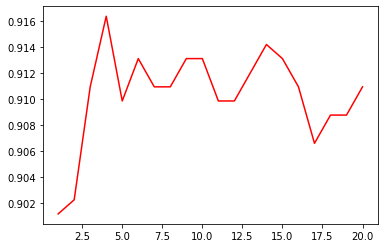

In [116]:
mp.plot(a[0], a[1], color = 'red')